# 2 Exploratory Data Analysis<a id='2_exploratory_data_analysis'></a>

In [1]:
# Import libraries
import os
import csv
import json
import numpy as np
import pandas as pd
import pandas_profiling
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

## 2.1 Load Data

In [2]:
# Data directory references
metadata_dir = r'..\data\metadata'
intermediate_dir = r'..\data\intermediate'

In [3]:
# Create metadata dataframe
metadata = pd.read_excel(os.path.join(metadata_dir, 'listings_dictionary.xlsx'))
metadata = metadata.set_index('Name')

In [4]:
# Load dtypes from df_clean from data wrangling step
dtypes_fn = 'clean_dtypes.json'
with open(os.path.join(intermediate_dir, dtypes_fn)) as f:
          clean_dtypes = json.load(f)
clean_dtypes

{'origination_month': 'float32',
 'chargeoff_amount': 'float32',
 'debt_sale_recovery': 'float32',
 'principal_paid': 'float32',
 'interest_paid': 'float32',
 'chargeoff': 'int8',
 'closed_month': 'float32',
 'listing_creation_date': 'datetime64[ns]',
 'loan_origination_date': 'datetime64[ns]',
 'listing_status': 'Int16',
 'listing_amount': 'float32',
 'prosper_rating': 'object',
 'lender_yield': 'float32',
 'borrower_rate': 'float32',
 'borrower_apr': 'float32',
 'listing_term': 'Int16',
 'listing_monthly_payment': 'float32',
 'prosper_score': 'Int16',
 'income_range': 'Int16',
 'stated_monthly_income': 'float32',
 'income_verifiable': 'object',
 'employment_status_description': 'object',
 'occupation': 'object',
 'months_employed': 'Int32',
 'borrower_state': 'object',
 'prior_prosper_loans_active': 'float32',
 'prior_prosper_loans': 'float32',
 'prior_prosper_loans_principal_borrowed': 'float32',
 'prior_prosper_loans_principal_outstanding': 'float32',
 'prior_prosper_loans_balance_

In [5]:
clean_fn = 'listings_clean.csv'
# Pass datetime fields to parse_dates
dtype = {k: v for k, v in clean_dtypes.items() if v != 'datetime64[ns]'}
parse_dates = [k for k, v in clean_dtypes.items() if v == 'datetime64[ns]']
df_clean = pd.read_csv(os.path.join(intermediate_dir, clean_fn), dtype=dtype, parse_dates=parse_dates)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579634 entries, 0 to 579633
Data columns (total 71 columns):
 #   Column                                            Non-Null Count   Dtype         
---  ------                                            --------------   -----         
 0   listing_number                                    579634 non-null  int64         
 1   origination_month                                 579634 non-null  float32       
 2   chargeoff_amount                                  579634 non-null  float32       
 3   debt_sale_recovery                                579634 non-null  float32       
 4   principal_paid                                    579634 non-null  float32       
 5   interest_paid                                     579634 non-null  float32       
 6   chargeoff                                         579634 non-null  int8          
 7   closed_month                                      579634 non-null  float32       
 8   listing_creati

In [6]:
# Drop columns not needed for EDA
df_eda = df_clean.drop(['listing_number', 'origination_month', 'closed_month',
                        'chargeoff_amount', 'debt_sale_recovery', 'principal_paid', 'interest_paid',
                         'listing_creation_date', 'loan_origination_date', 'listing_status'], errors='ignore', axis=1)
df_eda.head()

chargeoff  listing_amount prosper_rating  lender_yield  borrower_rate  \
0          1          2000.0              C        0.1870         0.1970   
1          1          7000.0              C        0.1870         0.1970   
2          1         32000.0              B        0.1340         0.1440   
3          1         12000.0              C        0.1880         0.1980   
4          1         15000.0              C        0.1924         0.2024   

   borrower_apr  listing_term  listing_monthly_payment  prosper_score  \
0       0.22140            60                52.650002              4   
1       0.22140            60               184.289993              5   
2       0.16713            60               751.239990             11   
3       0.22242            60               316.589996              4   
4       0.22693            60               399.410004              3   

   income_range  ...  IN09S IN21S MT01S OF01S  RE01S RE21S  RT01S  S207S  \
0             4  ...    1.0  15.0   0.0   0.0    9.0  12.0    6.0   -4.0   
1             4  ...    0.0  44.0   3.0   0.0   25.0   9.0    5.0   -4.0   
2             6  ...    1.0  24.0   3.0   0.0    9.0  13.0    4.0   -4.0   
3             4  ...    2.0  13.0   0.0  11.0   22.0   2.0   12.0   -4.0   
4             6  ...    0.0  25.0   4.0  14.0    9.0  27.0    1.0   -4.0   

   dti_wprosper_loan  co_borrower_application  
0               0.18                    False  
1               0.46                    False  
2               0.14                    False  
3               0.26                    False  
4               0.25                    False  

[5 rows x 61 columns]

In [7]:
# Isolate credit bureau columns
tu = metadata['Description'][metadata['Transunion'] == 1]
tu_cols = [c for c in df_eda.columns if c in tu.index]
# Isolate columns for prior prosper loan
prior_prosper_cols = [c for c in df_eda.columns if 'prior_prosper' in c]
# Isolate all other columns
cols = [c for c in df_eda.columns if c not in tu_cols and c not in prior_prosper_cols]

## 2.2 Data Profile 

### 2.2.1 Summary Statistics

In [8]:
# Descriptive statistics on all columns except credit bureau and prior_prosper_
df_eda[cols].describe().T

count          mean            std        min  \
chargeoff                579634.0      0.185360       0.388590     0.0000   
listing_amount           579634.0  13379.106445    8099.694824  2000.0000   
lender_yield             579634.0      0.143525       0.068712     0.0431   
borrower_rate            579634.0      0.153525       0.068712     0.0531   
borrower_apr             579634.0      0.184540       0.072761     0.0565   
listing_term             579634.0     42.506658      10.668804    36.0000   
listing_monthly_payment  579634.0    413.482635     242.872055    40.0700   
prosper_score            579634.0      7.151986       2.565133     0.0000   
income_range             579634.0      4.295989       1.168621     2.0000   
stated_monthly_income    579634.0   6953.832031  134364.187500     0.0000   
months_employed          579634.0    112.096030     138.330540    -7.0000   
lender_indicator         579634.0      0.009749       0.098256     0.0000   
dti_wprosper_loan        579634.0      0.261039       0.117930     0.0000   

                                 25%           50%           75%           max  
chargeoff                   0.000000      0.000000      0.000000  1.000000e+00  
listing_amount           7500.000000  12000.000000  18000.000000  4.000000e+04  
lender_yield                0.090900      0.125900      0.182400  3.092000e-01  
borrower_rate               0.100900      0.135900      0.192400  3.192000e-01  
borrower_apr                0.132600      0.168210      0.226060  3.600000e-01  
listing_term               36.000000     36.000000     60.000000  6.000000e+01  
listing_monthly_payment   235.369995    361.320007    537.409973  1.423920e+03  
prosper_score               5.000000      7.000000      9.000000  1.100000e+01  
income_range                3.000000      4.000000      5.000000  6.000000e+00  
stated_monthly_income    3750.000000   5416.666504   7816.666504  6.291672e+07  
months_employed            29.000000     76.000000    162.000000  1.210800e+04  
lender_indicator            0.000000      0.000000      0.000000  1.000000e+00  
dti_wprosper_loan           0.170000      0.250000      0.330000  8.600000e-01

In [9]:
# Describe categorical variables
df_eda[cols].describe(include=['O']).T

count unique       top    freq
prosper_rating                 579634      7         C  148382
income_verifiable              579634      2      True  579621
employment_status_description  579634      7  Employed  495105
occupation                     579634     74     Other  124061
borrower_state                 579634     50        CA   81189
co_borrower_application        579634      2     False  579504

### 2.2.2 Profile Report

In [10]:
profile = df_eda.profile_report(sort='None', html={'style':{'full_width': True}}, minimal=True, progress_bar=True)
profile

Summarize dataset:   0%|          | 0/69 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### 2.2.3 Distribution Plots

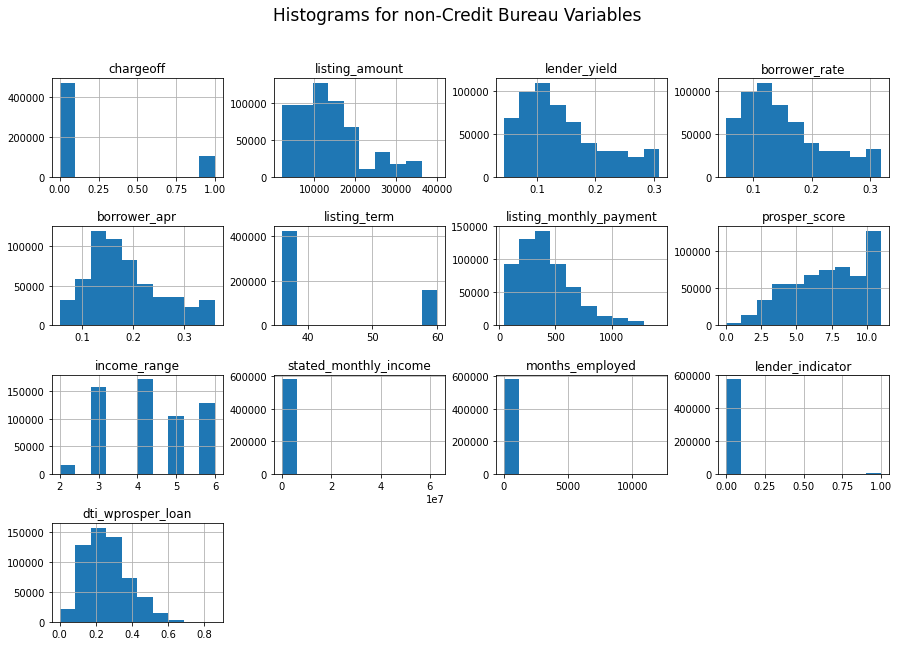

In [11]:
df_eda[cols].hist(figsize=(15, 10))
plt.subplots_adjust(hspace=0.5)
plt.suptitle('Histograms for non-Credit Bureau Variables', size=17)
plt.show()

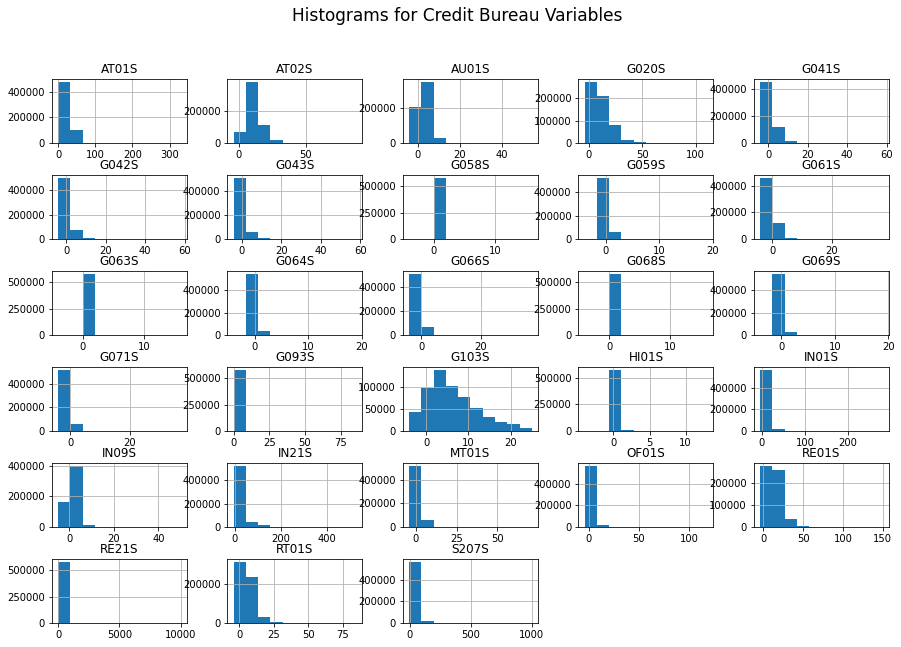

In [12]:
df_eda[tu_cols].hist(figsize=(15, 10))
plt.subplots_adjust(hspace=0.5)
plt.suptitle('Histograms for Credit Bureau Variables', size=17)
plt.show()

### 2.2.4 Data Profile Observations

- As observed in data wrangling stage, `stated_monthly_income` is skewed.  Consider only using categorical `income_range` column.
- `income_verifiable` is heavily skewed to True with only 13 False records.  This column will be discarded.
- `occupation` has high cardinality with 74 distinct values.  Consider grouping occupations together.
- `months_employed`, similar to `stated_monthly_income`, is heavily skewed with a maximum value of 12,108 which is 1,009 years employed.  Consider binning based on quantiles to minimize the impact of outliers.
- All of the `prior_prosper_` columns are primarily zero so the majority of listings are for customers that did not have a prior Prosper loan.  May discard these columns pending further analysis.
- `lender_indicator` is heavily skewed to zero values.  A one means the listing is for a borrower and investor.  This column will be discarded.
- `co_borrwer_application` is heavily skewed to False values.  This column will be discarded.

## 2.3 Data Relationships

### 2.3.1 Helper Functions

In [13]:
# Weight of Evidence (WOE) - Information Value (IV) table
def calculate_woe_iv(df, feature, target):
    lst = []
    for i in range(df[feature].nunique()):
        val = list(df[feature].unique())[i]
        lst.append({
            'Value': val,
            'All': df[df[feature] == val].count()[feature],
            'Good': df[(df[feature] == val) & (df[target] == 0)].count()[feature],
            'Bad': df[(df[feature] == val) & (df[target] == 1)].count()[feature]
        })
    dset = pd.DataFrame(lst)
    dset['Distr_Good'] = dset['Good'] / dset['Good'].sum()
    dset['Distr_Bad'] = dset['Bad'] / dset['Bad'].sum()
    dset['WoE'] = np.log(dset['Distr_Good'] / dset['Distr_Bad'])
    dset = dset.replace({'WoE': {np.inf: 0, -np.inf: 0}})
    dset['IV'] = (dset['Distr_Good'] - dset['Distr_Bad']) * dset['WoE']
    iv = dset['IV'].sum()
    dset = dset.sort_values(by='WoE')
    return dset, iv

In [14]:
# Clean up field for charge labels
def field_label(col):
    return ' '.join([s.capitalize() for s in col.split('_')])

In [15]:
# Separate histograms for chargeoff
def histogram_chargeoff(y, df):
    fig, ax = plt.subplots(figsize=(10,5))
    y_label = field_label(y)
    df[y][df_eda['chargeoff'] == 0].plot.hist(color='tab:blue', label='Paid Off', ax=ax)
    df[y][df_eda['chargeoff'] == 1].plot.hist(color='r', alpha=0.75, label='Charged Off', ax=ax)
    plt.title(y_label+ ' Distribution for Paid Off vs. Charged Off', size=15)
    plt.legend()

In [16]:
# Boxplots with a categorical variable on the x-axis
def boxplot_categorical(x, y, df):
    fig, ax = plt.subplots(figsize=(10,5))
    x_label = field_label(x)
    y_label = field_label(y)
    sns.boxplot(x=x, y=y, data=df, ax=ax)
    plt.xlabel(x_label, size=10)
    plt.ylabel(y_label, size=10)
    plt.title(y_label + ' Distribution by ' + x_label, size=15)

In [17]:
# Violin plots with a categorical variable on the x-axis
def violinplot_categorical(x, y, df):
    fig, ax = plt.subplots(figsize=(10,5))
    x_label = field_label(x)
    y_label = field_label(y)
    sns.violinplot(x=x, y=y, data=df, ax=ax)
    plt.xlabel(x_label, size=10)
    plt.ylabel(y_label, size=10)
    plt.title(y_label + ' Distribution by ' + x_label, size=15)

In [18]:
# Combo countplot with chargeoff % on secondary axis
def combo_chart(x, df):
    fig, ax = plt.subplots(figsize=(10,5))
    sns.countplot(x=x, data=df, color='tab:blue', ax=ax)
    x_label = field_label(x)
    ax.set_xlabel(x_label, size=10)
    ax.set_ylabel('Number of Listings', size=10)
    ax2 = ax.twinx()
    x_co = df.groupby(x).mean()['chargeoff']
    # If x is an object dtype make sure the order is the same as the countplot
    if df[x].dtype == 'O':
        # Get labels for xaxis
        x_labels = [label.get_text() for label in ax.get_xticklabels()]
        # Make sure Series index is the same order as countplot
        x_co = pd.Series(x_co, index=x_labels)
    # Treat values as a string for x axis
    x_co.index = x_co.index.map(str)
    sns.scatterplot(x=x_co.index, y=x_co, color='tab:red',  marker='o', s=100, label='Chargeoff %', ax=ax2)
    plt.legend()
    ax2.set_ylabel('Chargeoff %', size=10)
    #ax2.yaxis.label.set_visible(False)
    plt.title(x_label + ' Frequency and Chargeoff %', size=15)

### 2.3.2 Chargeoff Relationship Plots

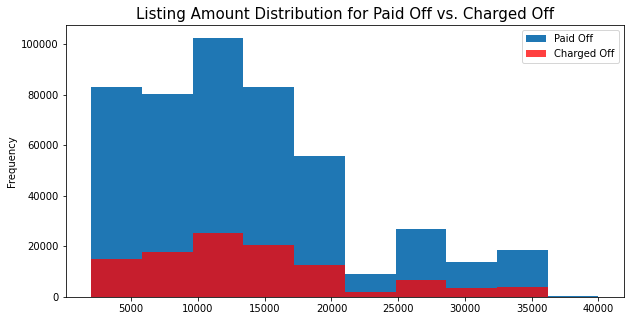

In [19]:
histogram_chargeoff('listing_amount', df_eda)

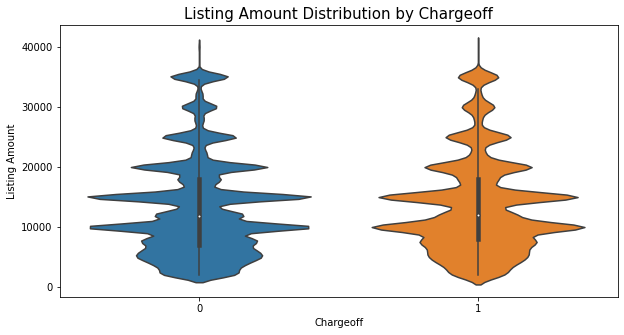

In [20]:
violinplot_categorical('chargeoff', 'listing_amount', df_eda)

In [21]:
df_eda['listing_amount_bin'] = pd.cut(df_eda['listing_amount'], bins=range(0, 40000, 5000))
woe_tbl_la, la_iv = calculate_woe_iv(df_eda, 'listing_amount_bin', 'chargeoff')
woe_tbl_la

Value     All    Good    Bad  Distr_Good  Distr_Bad       WoE  \
5  (20000.0, 25000.0]   39244   31444   7800    0.066633   0.072616 -0.085972   
6  (25000.0, 30000.0]   19791   15894   3897    0.033681   0.036280 -0.074322   
1   (5000.0, 10000.0]  184716  148835  35881    0.315399   0.334041 -0.057426   
3  (10000.0, 15000.0]  138400  111715  26685    0.236737   0.248429 -0.048207   
4  (15000.0, 20000.0]   80133   65575  14558    0.138961   0.135530  0.024997   
2  (30000.0, 35000.0]   25110   20754   4356    0.043980   0.040553  0.081128   
0       (0.0, 5000.0]   91916   77678  14238    0.164609   0.132551  0.216601   

         IV  
5  0.000514  
6  0.000193  
1  0.001071  
3  0.000564  
4  0.000086  
2  0.000278  
0  0.006944

Distribution of listings by `listing_amount` is skewed to the right but the distribution between paid off and charged off loans is the same.  However, as shown in the WoE calculations the distribution of charged off (bad) is higher for lower listing amount bins.

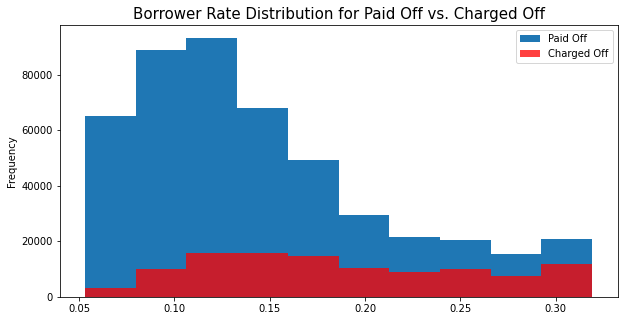

In [22]:
histogram_chargeoff('borrower_rate', df_eda)

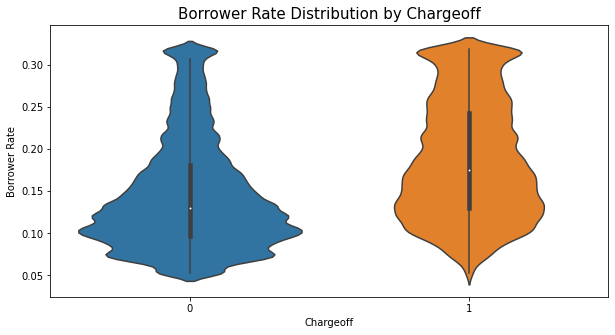

In [23]:
violinplot_categorical('chargeoff', 'borrower_rate', df_eda)

Higher interest rates have higher risk and probability for chargeoff but also would have higher returns so will need to balance this risk/reward tradeoff.

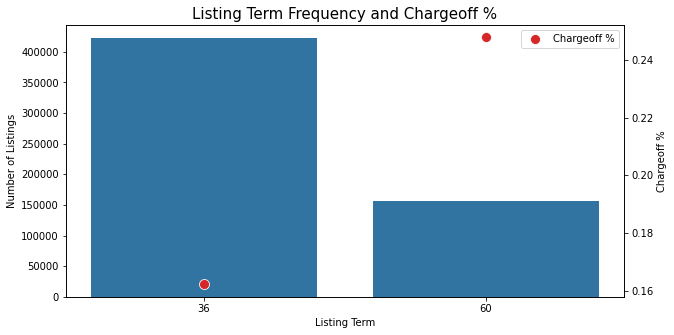

In [24]:
combo_chart('listing_term', df_eda)

In [25]:
woe_tbl_lt, lt_iv = calculate_woe_iv(df_eda, 'listing_term', 'chargeoff')
woe_tbl_lt

Value     All    Good    Bad  Distr_Good  Distr_Bad       WoE        IV
0     60  157145  118192  38953    0.250304   0.362552 -0.370491  0.041587
1     36  422489  354001  68488    0.749696   0.637448  0.162195  0.018206

Longer term loans have a higher probability of chargeoff.

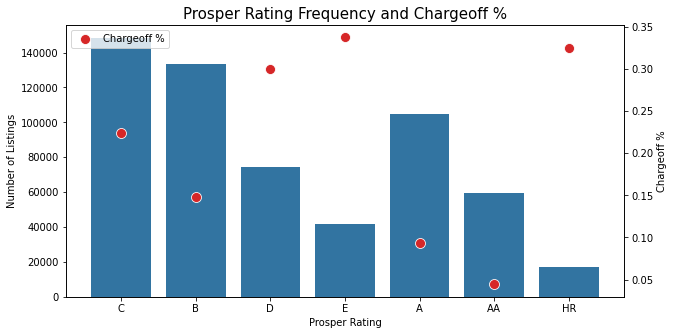

In [26]:
combo_chart('prosper_rating', df_eda)

In [27]:
woe_tbl_pr, pr_iv = calculate_woe_iv(df_eda, 'prosper_rating', 'chargeoff')
woe_tbl_pr

Value     All    Good    Bad  Distr_Good  Distr_Bad       WoE        IV
3     E   41887   27751  14136    0.058770   0.131570 -0.805899  0.058669
6    HR   17192   11602   5590    0.024570   0.052029 -0.750248  0.020600
2     D   74206   51927  22279    0.109970   0.207360 -0.634252  0.061770
0     C  148382  115141  33241    0.243843   0.309388 -0.238073  0.015605
1     B  133356  113605  19751    0.240590   0.183831  0.269077  0.015273
4     A  104889   95085   9804    0.201369   0.091250  0.791535  0.087163
5    AA   59722   57082   2640    0.120887   0.024572  1.593264  0.153456

AA is the highest quality rating and HR is the lowest.  Chargeoff probability increases as the rating decreases with an AA rating having the best predictive power.

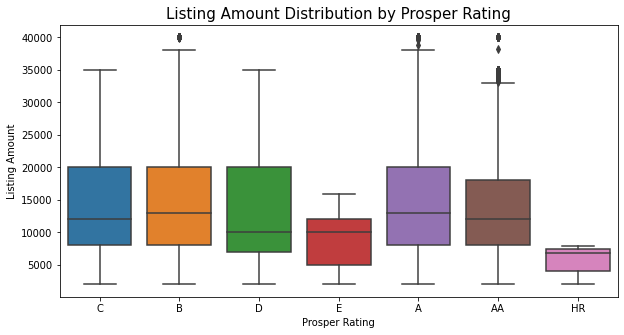

In [28]:
boxplot_categorical('prosper_rating', 'listing_amount', df_eda)

`listing_amount` distribution is similiar for listings rated AA - D.  There appears to be a maximum listing amount for listings rated E and HR which makes sense from a risk perspective.

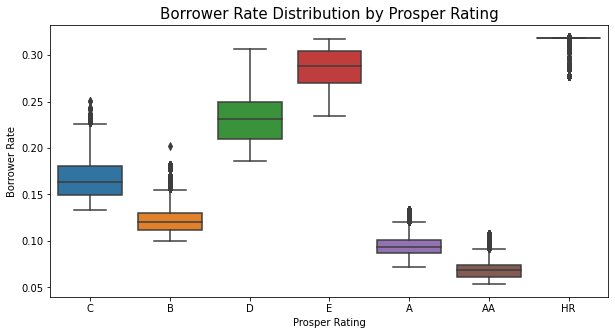

In [29]:
boxplot_categorical('prosper_rating', 'borrower_rate', df_eda)

`borrower_rate` is clearly influenced by the `prosper_rating` with the lowest risk borrowers receiving the most competitive rates.

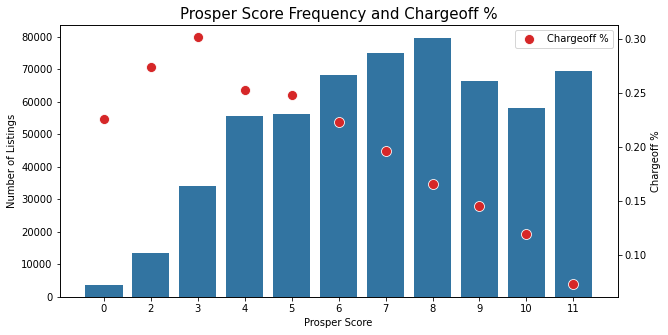

In [30]:
combo_chart('prosper_score', df_eda)

In [31]:
woe_tbl_ps, ps_iv = calculate_woe_iv(df_eda, 'prosper_score', 'chargeoff')
woe_tbl_ps

Value    All   Good    Bad  Distr_Good  Distr_Bad       WoE        IV
3       3  34186  23871  10315    0.050553   0.096006 -0.641381  0.029152
7       2  13409   9735   3674    0.020617   0.034196 -0.505999  0.006871
0       4  55649  41563  14086    0.088021   0.131105 -0.398417  0.017165
1       5  56119  42207  13912    0.089385   0.129485 -0.370612  0.014862
10      0   3533   2736    797    0.005794   0.007418 -0.247048  0.000401
5       6  68366  53132  15234    0.112522   0.141789 -0.231196  0.006767
4       7  74934  60219  14715    0.127530   0.136959 -0.071325  0.000672
8       8  79638  66479  13159    0.140788   0.122477  0.139334  0.002551
9       9  66289  56661   9628    0.119995   0.089612  0.291965  0.008871
6      10  58093  51195   6898    0.108420   0.064203  0.523964  0.023168
2      11  69418  64395   5023    0.136374   0.046751  1.070563  0.095947

The `prosper_score` has an inverse relationship to `prosper_rating`.  The higher the score the lower the risk and probability of chargeoff.

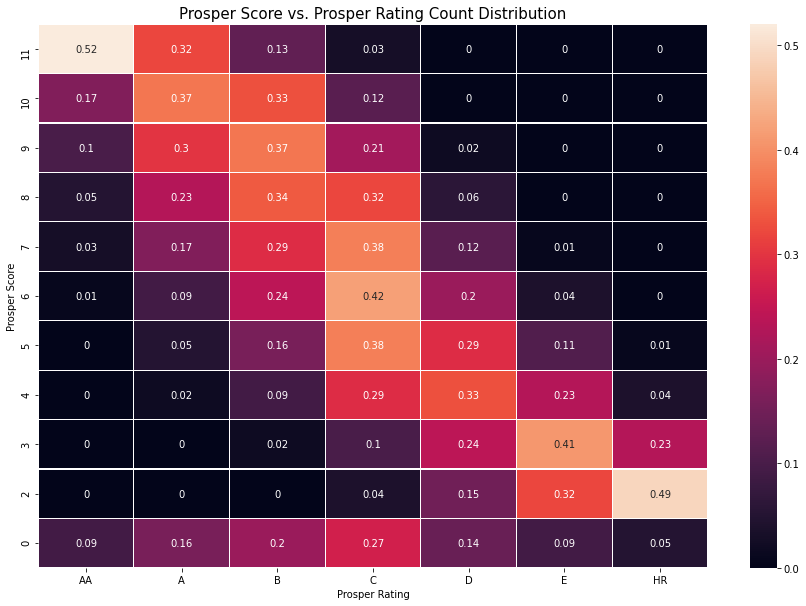

In [32]:
fig, ax = plt.subplots(figsize=(15,10))
score_ct = pd.crosstab(df_eda['prosper_score'], df_eda['prosper_rating'], normalize='index').round(2)
score_ct = score_ct.sort_index(ascending=False)
score_ct = score_ct.reindex(columns=['AA', 'A', 'B', 'C', 'D', 'E', 'HR'])
sns.heatmap(score_ct, linewidths=.1, annot=True, ax=ax)
plt.xlabel('Prosper Rating', size=10)
plt.ylabel('Prosper Score', size=10)
plt.title('Prosper Score vs. Prosper Rating Count Distribution', size=15)
plt.show()

The relationship between `prosper_rating` and `prosper_score` is more apparent here with the larger percentages showing diagionally from top left to bottom right.  The exception is the zero values set for `prosper_score` during the data wrangling step.  Based on this analysis it would make more sense to replace the `prosper_score` with the most common value based on the `prosper_rating`.  For example, the 27% of the blanks with a C `prosper_rating` will be replaced with a `prosper_score` of 6.

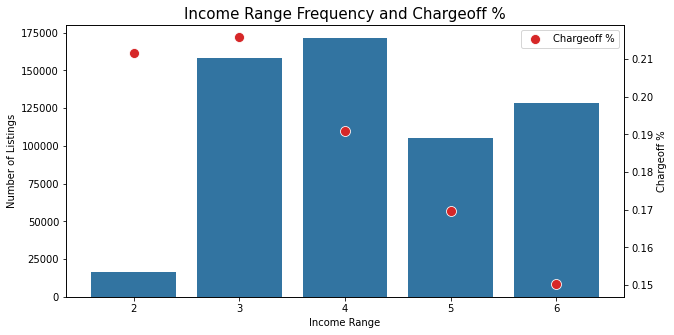

In [33]:
combo_chart('income_range', df_eda)

In [34]:
woe_tbl_inc, inc_iv = calculate_woe_iv(df_eda, 'income_range', 'chargeoff')
woe_tbl_inc

Value     All    Good    Bad  Distr_Good  Distr_Bad       WoE        IV
3      3  158105  123993  34112    0.262590   0.317495 -0.189870  0.010425
4      2   16263   12820   3443    0.027150   0.032045 -0.165783  0.000812
0      4  171579  138846  32733    0.294045   0.304660 -0.035464  0.000376
2      5  105178   87325  17853    0.184935   0.166166  0.107019  0.002009
1      6  128509  109209  19300    0.231280   0.179633  0.252712  0.013052

Borrowers with lower income levels have a higher probability of not paying back the loan.

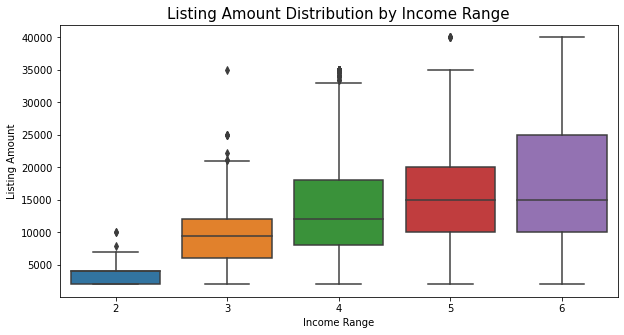

In [35]:
boxplot_categorical('income_range', 'listing_amount', df_eda)

Borrowers with the lowest income level appear to have maximum loan limits most likely based on debt ratio limits.

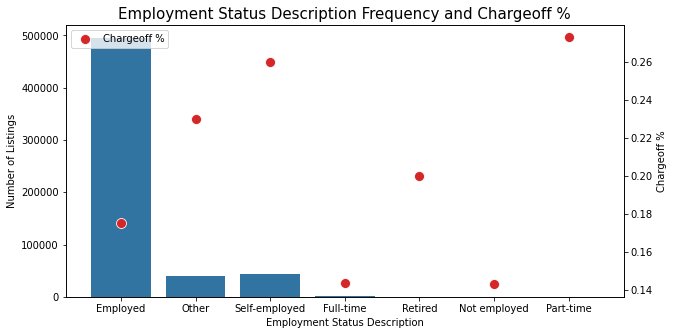

In [36]:
combo_chart('employment_status_description', df_eda)

In [37]:
woe_tbl_emp, inc_emp = calculate_woe_iv(df_eda, 'employment_status_description', 'chargeoff')
woe_tbl_emp

Value     All    Good    Bad  Distr_Good  Distr_Bad       WoE  \
6      Part-time      11       8      3    0.000017   0.000028 -0.499617   
2  Self-employed   44277   32785  11492    0.069431   0.106961 -0.432126   
1          Other   39572   30471   9101    0.064531   0.084707 -0.272055   
4        Retired      15      12      3    0.000025   0.000028 -0.094152   
0       Employed  495105  408357  86748    0.864810   0.807401  0.068688   
3      Full-time     647     554     93    0.001173   0.000866  0.304119   
5   Not employed       7       6      1    0.000013   0.000009  0.311314   

             IV  
6  5.485830e-06  
2  1.621755e-02  
1  5.489016e-03  
4  2.362229e-07  
0  3.943286e-03  
3  9.356464e-05  
5  1.058228e-06

The `employment_status_description` has some inconcistencies that could be related to merging historical data such as Employed vs. Full-time.  The vast majority of listings are under the category Employed but Self-Employed and Other represents ~19% of the chargoffs.  This variable will be cleaned to three values: Employed, Self-employed and Not-employed and then encoded for model training.

In [38]:
woe_tbl_occ, inc_occ = calculate_woe_iv(df_eda, 'occupation', 'chargeoff')
pd.set_option('display.max_rows', None)
woe_tbl_occ

Value     All    Good    Bad  \
70                Student - College Freshman      40      25     15   
68        Secretary/Administrative Assistant      33      22     11   
49  Profession that is not part of this list     532     374    158   
67    Nurse - Licensed Practical Nurse (LPN)      14      10      4   
7                               Truck Driver   16290   11857   4433   
38                                Car Dealer    1638    1195    443   
56                                 Homemaker     569     423    146   
66               Student - Community College      82      61     21   
46                                Bus Driver    2526    1883    643   
0                               Nurse's Aide    4115    3080   1035   
58                     Tradesman - Carpenter     825     623    202   
2                    Food Service Management    8079    6118   1961   
44                               Landscaping    1438    1098    340   
36                           Waiter/Waitress    1914    1462    452   
16                              Food Service    7371    5632   1739   
15                                   Laborer   11228    8594   2634   
25                                   Unknown   36170   27738   8432   
69                  Student - College Junior     100      77     23   
65             Nurse - Registered Nurse (RN)      89      69     20   
33                                  Investor    1278     992    286   
1                             Sales - Retail   14438   11252   3186   
41                               Nurse (LPN)    3632    2834    798   
23                              Construction   15835   12371   3464   
21                             Skilled Labor   18835   14837   3998   
48                                   Realtor    3140    2475    665   
12                         Retail Management   14104   11196   2908   
42                            Postal Service    2980    2374    606   
27                        Sales - Commission   16739   13353   3386   
14                        Medical Technician    7174    5749   1425   
54                       Tradesman - Plumber     850     683    167   
24                      Tradesman - Mechanic    6474    5235   1239   
28                   Tradesman - Electrician    2927    2368    559   
3                                      Other  124061  100511  23550   
6                              Social Worker    4038    3289    749   
71                 Student - Graduate School       1       1      0   
73                             Self Employed       1       1      0   
64               Student - College Sophomore      65      53     12   
29                       Engineer - Chemical     895     730    165   
61                            Teacher's Aide    1111     907    204   
35                                  Clerical   16025   13089   2936   
50                  Student - College Senior     130     107     23   
53                                   Dentist     720     595    125   
17                     Engineer - Mechanical    7299    6054   1245   
13                  Administrative Assistant   12350   10271   2079   
43                         Military Enlisted    3607    3021    586   
32                                 Principal    1686    1419    267   
39                                Pharmacist    1343    1131    212   
9                               Professional   58508   49292   9216   
57                          Flight Attendant     762     642    120   
19         Police Officer/Correction Officer    8708    7351   1357   
31                                 Executive   23908   20190   3718   
8                      Engineer - Electrical    5102    4322    780   
22                                Nurse (RN)   18976   16163   2813   
20                             Civil Service    5581    4765    816   
5                                    Teacher   17929   15316   2613   
52                                 Architect    1141     975   

Utilize a WOE categorical encoder in the preprocessing stage for the `occupation` column due to to high cardinality.

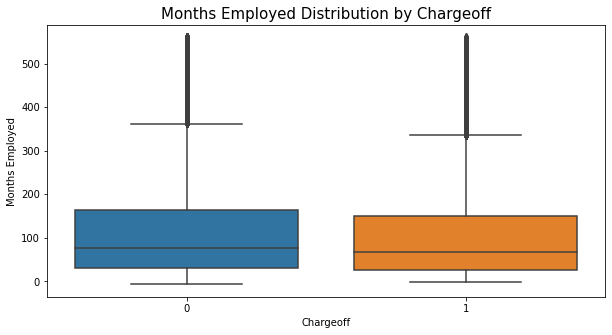

In [39]:
Q1 = df_eda['months_employed'].quantile(0.25)
Q3 = df_eda['months_employed'].quantile(0.75)
IQR = Q3 - Q1
# Remove all rows that above 3x IQR to remove extreme outliers for months employed
df_me = df_eda[(df_eda['months_employed'] < (Q3 + 3 * IQR))]
boxplot_categorical('chargeoff', 'months_employed', df_me)

Once extreme outliers are removed there is virtually no difference in the distribution of `months_employed` for paid off vs. charged off loans.  This variable will be discarded.

In [40]:
# Average Chargeoff by state
state_co = df_eda.groupby('borrower_state').mean()['chargeoff']
state_co = state_co.reset_index()

# Create choropleth map
fig = go.Figure(data=go.Choropleth(
    locations=state_co['borrower_state'], # Spatial coordinates
    z = state_co['chargeoff'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "Chargeoff %",
))

fig.update_layout(
    title_text = 'Chargeoff % by US State',
    geo_scope='usa', # limite map scope to USA
)

fig.show()

The Mountain region states, Pacific Northwest and West Virginia/New York have the lowest chargeoff rates of all geographic regions.  Iowa is the only US state with no listings.

In [41]:
woe_tbl_state, inc_state = calculate_woe_iv(df_eda, 'borrower_state', 'chargeoff')
pd.set_option('display.max_rows', None)
woe_tbl_state

Value    All   Good    Bad  Distr_Good  Distr_Bad       WoE            IV
2     PA  10152   7756   2396    0.016425   0.022301 -0.305780  1.796495e-03
34    NV   9800   7631   2169    0.016161   0.020188 -0.222493  8.959936e-04
20    FL  46449  36324  10125    0.076926   0.094238 -0.202975  3.513819e-03
49    ND    171    134     37    0.000284   0.000344 -0.193524  1.172616e-05
35    MS   4494   3529    965    0.007474   0.008982 -0.183804  2.771831e-04
46    HI   3170   2494    676    0.005282   0.006292 -0.174996  1.767610e-04
27    LA   7005   5517   1488    0.011684   0.013849 -0.170045  3.682622e-04
38    AR   4890   3858   1032    0.008170   0.009605 -0.161796  2.321580e-04
21    MD  16478  13004   3474    0.027540   0.032334 -0.160496  7.694863e-04
10    AL   7442   5912   1530    0.012520   0.014240 -0.128729  2.214237e-04
26    OK   5742   4568   1174    0.009674   0.010927 -0.121787  1.525892e-04
6     NC  16603  13282   3321    0.028128   0.030910 -0.094302  2.623164e-04
47    SD   1149    922    227    0.001953   0.002113 -0.078851  1.263158e-05
45    RI   3111   2498    613    0.005290   0.005705 -0.075565  3.137823e-05
3     NJ  23935  19223   4712    0.040710   0.043857 -0.074451  2.342657e-04
42    NE   3193   2578    615    0.005460   0.005724 -0.047299  1.250775e-05
16    TX  50552  40873   9679    0.086560   0.090087 -0.039935  1.408385e-04
32    AZ  14229  11526   2703    0.024410   0.025158 -0.030203  2.260633e-05
1     CA  81189  65782  15407    0.139312   0.143400 -0.028922  1.182304e-04
33    MA  14039  11382   2657    0.024105   0.024730 -0.025610  1.601424e-05
4     AK   1423   1157    266    0.002450   0.002476 -0.010357  2.641755e-07
11    GA  21780  17747   4033    0.037584   0.037537  0.001260  5.963405e-08
9     NM   3154   2571    583    0.005445   0.005426  0.003417  6.346746e-08
8     MI  16396  13373   3023    0.028321   0.028136  0.006542  1.208155e-06
13    IN  10268   8378   1890    0.017743   0.017591  0.008586  1.302522e-06
7     VA  17286  14119   3167    0.029901   0.029477  0.014291  6.063060e-06
23    WI   8899   7270   1629    0.015396   0.015162  0.015344  3.597208e-06
17    KY   5881   4811   1070    0.010189   0.009959  0.022800  5.236705e-06
28    TN  10234   8380   1854    0.017747   0.017256  0.028057  1.377569e-05
19    MN  10806   8853   1953    0.018749   0.018177  0.030944  1.767730e-05
37    DC   1330   1090    240    0.002308   0.002234  0.032848  2.450273e-06
36    SC   7578   6240   1338    0.013215   0.012453  0.059358  4.520661e-05
25    OH  20682  17040   3642    0.036087   0.033898  0.062585  1.370143e-04
43    DE   1894   1562    332    0.003308   0.003090  0.068141  1.484811e-05
30    MO   9453   7821   1632    0.016563   0.015190  0.086560  1.188827e-04
39    KS   4954   4132    822    0.008751   0.007651  0.134330  1.477566e-04
5     IL  27069  22610   4459    0.047883   0.041502  0.143022  9.126388e-04
48    ME    392    329     63    0.000697   0.000586  0.172477  1.903814e-05
41    ID   2679   2258    421    0.004782   0.003918  0.199156  1.719738e-04
40    WY   1173    990    183    0.002097   0.001703  0.207773  8.172536e-05
15    NH   3228   2730    498    0.005782   0.004635  0.221011  2.533740e-04
24    MT   1660   1405    255    0.002975   0.002373  0.226083  1.361207e-04
29    UT   4114   3486    628    0.007383   0.005845  0.233524  3.590447e-04
14    WA  14344  12331   2013    0.026114   0.018736  0.332044  2.449975e-03
18    CO  11798  10158   1640    0.021512   0.015264  0.343119  2.143878e-03
0     OR   7900   6814   1086    0.014431   0.010108  0.356032  1.539008e-03
12    NY  24890  21644   3246    0.045837   0.030212  0.416859  6.513528e-03
31    CT   3363   3003    360    0.006360   0.003351  0.640817  1.928226e-03
22    WV    846    763     83    0.001616   0.000773  0.737971  6.223665e-04
44    VT    367    335     32    0.000709   0.000298  0.867949  3.572631e-04

Similar to `occupation`, will utilize a WOE categorical encoder in the preprocessing stage for the `borrower_state` column.

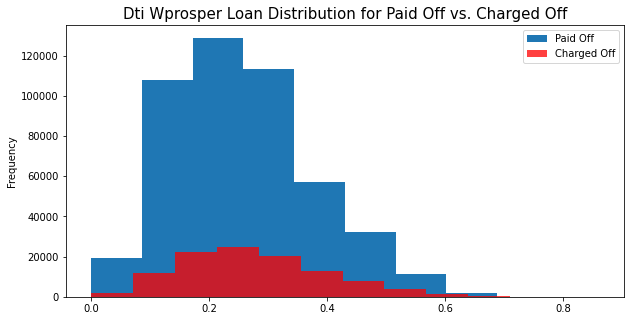

In [42]:
histogram_chargeoff('dti_wprosper_loan', df_eda)

The higher the Debt to Income rate with Prosper loan the larger distribution of charged loans relative to paid off.

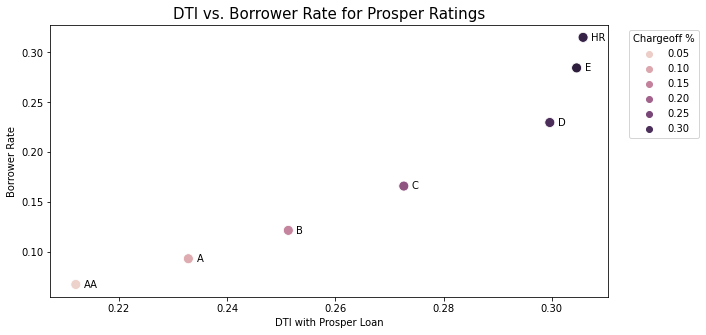

In [43]:
fig, ax = plt.subplots(figsize=(10,5))
pr_co = df_eda.groupby('prosper_rating').mean()[['dti_wprosper_loan', 'borrower_rate', 'chargeoff']]
x = pr_co['dti_wprosper_loan']
y = pr_co['borrower_rate']
val = pd.Series(pr_co.index)
ax = sns.scatterplot(x=x, y=y, hue='chargeoff', s=100, data=pr_co, ax=ax)
plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1), title='Chargeoff %')
plt.xlabel('DTI with Prosper Loan')
plt.ylabel('Borrower Rate')
plt.title('DTI vs. Borrower Rate for Prosper Ratings', size=15)
# Add Prosper Rating labels
for i in range(pr_co.shape[0]):
    plt.text(x=x[i]+.0015, y=y[i]-.003, s=val[i], fontdict=dict(color='black',size=10))
plt.show()

There is a direct relationship between the `prosper_rating` and the borrowers debit to income ratio and interest rate for the listing.  The probability for chargeoff increases for higher debt ratios/interest rates.

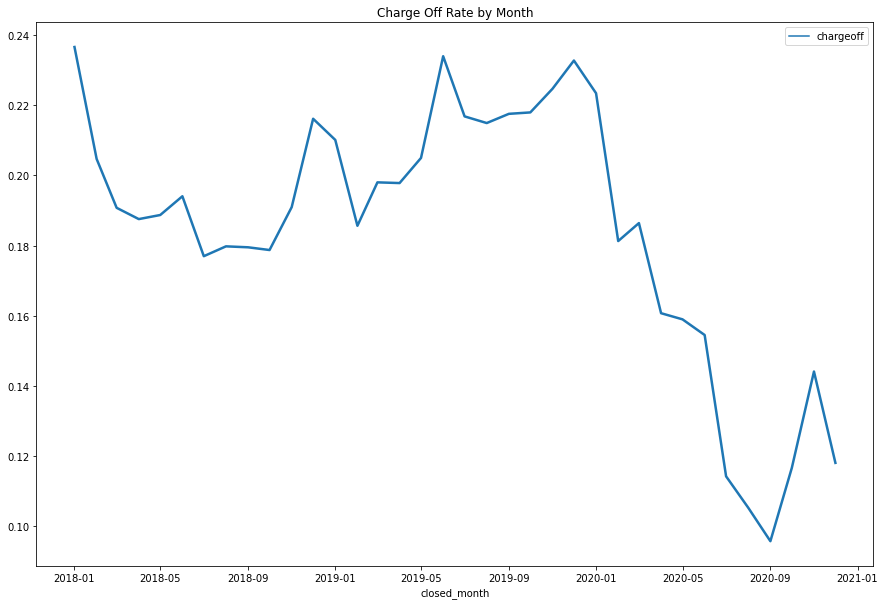

In [44]:
# Plot closed loans to get an idea on potential timeframe filters
fig, ax = plt.subplots(figsize=(15,10))
co_month = df_clean.groupby('closed_month').mean()[['chargeoff']]
co_month.index = pd.to_datetime(co_month.index.astype(int), format='%Y%m')
sns.lineplot(data=co_month, linewidth=2.5, ax=ax)
#palette="tab10", 
plt.title('Charge Off Rate by Month')
plt.show()

Due to the coronavirus pandemic financial institutions had some limitations on recourse for loans in default and the drastic drop in `chargeoff` rates to sub 10% levels by September 2020.  Since many loans may not have been written off due to the pandemic all closed loans prior to March 2020 will be excluded from modeling.

### 2.3.3 Correlation Analysis

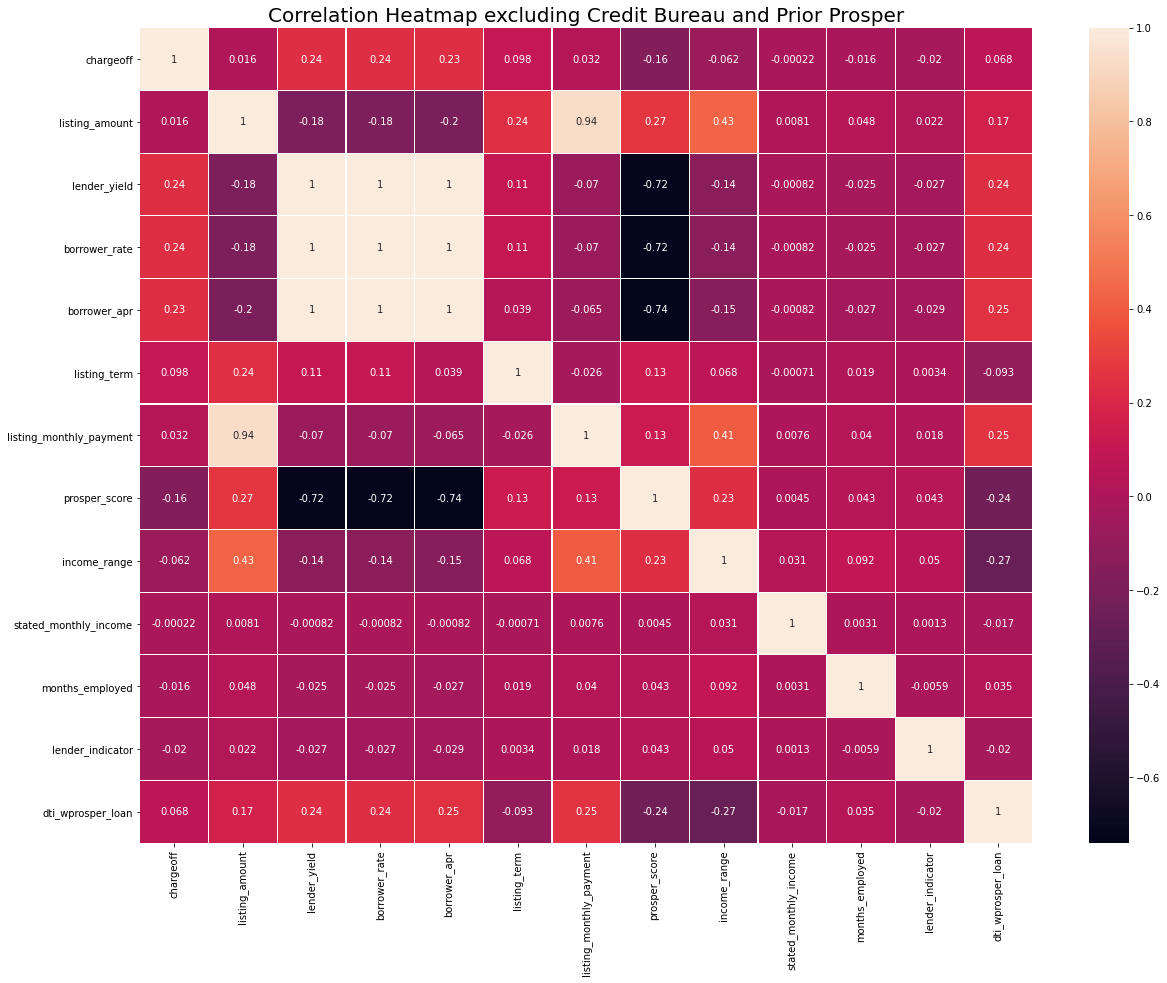

In [45]:
# Correlation heatmap for all columns except credit bureau and prior_prosper_
fig, ax = plt.subplots(figsize=(20,15))
corr = df_eda[cols].corr()
sns.heatmap(corr, linewidths=.1, annot=True, ax=ax)
plt.title('Correlation Heatmap excluding Credit Bureau and Prior Prosper', size=20)
plt.show()

`lender_yield`, `borrower_rate` and `borrower_apr` are 100% correlated with each other.  The `lender_yield` is similar the `borrower_rate` less the investor servicing fee.  The `borrower_apr` will reflect the actual costs of the loan but the assumption is the fees for a personal loan in the prosper marketplace are similar.  Will proceed forward with only the `borrower_rate` column.

The only columns that have some degree of correlation with `chargeoff` are `borrower_rate` and `prosper_score`.

`listing_amount` and `listing_monthly_payment` are higher correlated since this is direct output based on the amount and rate.  Will proceed forward with only the `listing_amount`.

**Summary of Transunion credit bureau columns:**

| Column | Description | Valid Values | Special Values |
| ------ | ----------- | ------------ | --------------
| AT01S  | Number of trades | 0-999 | NONE |
| AT02S  | Number of open trades | 0-999 | -4 |
| AU01S  | Number of auto trades | 0-999 | -4 |
| G020S  | Number of trades with maximum delinquency of 30 days past due in past 24 months | 0-999 | -2, -4 |
| G041S  | Number of trades 30 or more days past due ever | 0-999 | -4 |
| G042S  | Number of trades 60 or more days past due ever | 0-999 | -4 |
| G043S  | Number of trades 90 or more days past due ever | 0-999 | -4 |
| G058S  | Number of trades 30 or more days past due in past 6 months | 0-999 | -4 |
| G059S  | Number of trades 30 or more days past due in past 12 months | 0-999 | -4 |
| G061S  | Number of trades 30 or more days past due in past 24 months | 0-999 | -4 |
| G063S  | Number of trades 60 or more days past due in past 6 months | 0-999 | -4 |
| G064S  | Number of trades 60 or more days past due in past 12 months | 0-999 | -4 |
| G066S  | Number of trades 60 or more days past due in past 24 months | 0-999 | -4 |
| G068S  | Number of trades 90 or more days past due in past 6 months | 0-999 | -4 |
| G069S  | Number of trades 90 or more days past due in past 12 months | 0-999 | -4 |
| G071S  | Number of trades 90 or more days past due in past 24 months | 0-999 | -4 |
| G093S  | Number of public records | 0-999 | NONE |
| G103S  | Months since most recent credit inquiry | 0-999 | -1,-4 |
| HI01S  | Number of home equity loan trades | 0-999 | -4 |
| IN01S  | Number of installment trades | 0-999 | -4 |
| IN09S  | Number of installment trades opened in past 24 months | 0-999 | -1,-4,-5 |
| IN21S  | Months since most recent installment trade opened | 0-999 | -1,-4,-5 |
| MT01S  | Number of mortgage trades | 0-999 | -4 |
| OF01S  | Number of credit union trades | 0-999 | -4 |
| RE01S  | Number of revolving trades | 0-999 | -4 |
| RE21S  | Months since most recent revolving trade opened | 0-999 | -1,-4,-5 |
| RT01S  | Number of retail trades | 0-999 | -4 |
| S207S  | Months since most recent public record bankruptcy | 0-999 | -1,-4 |

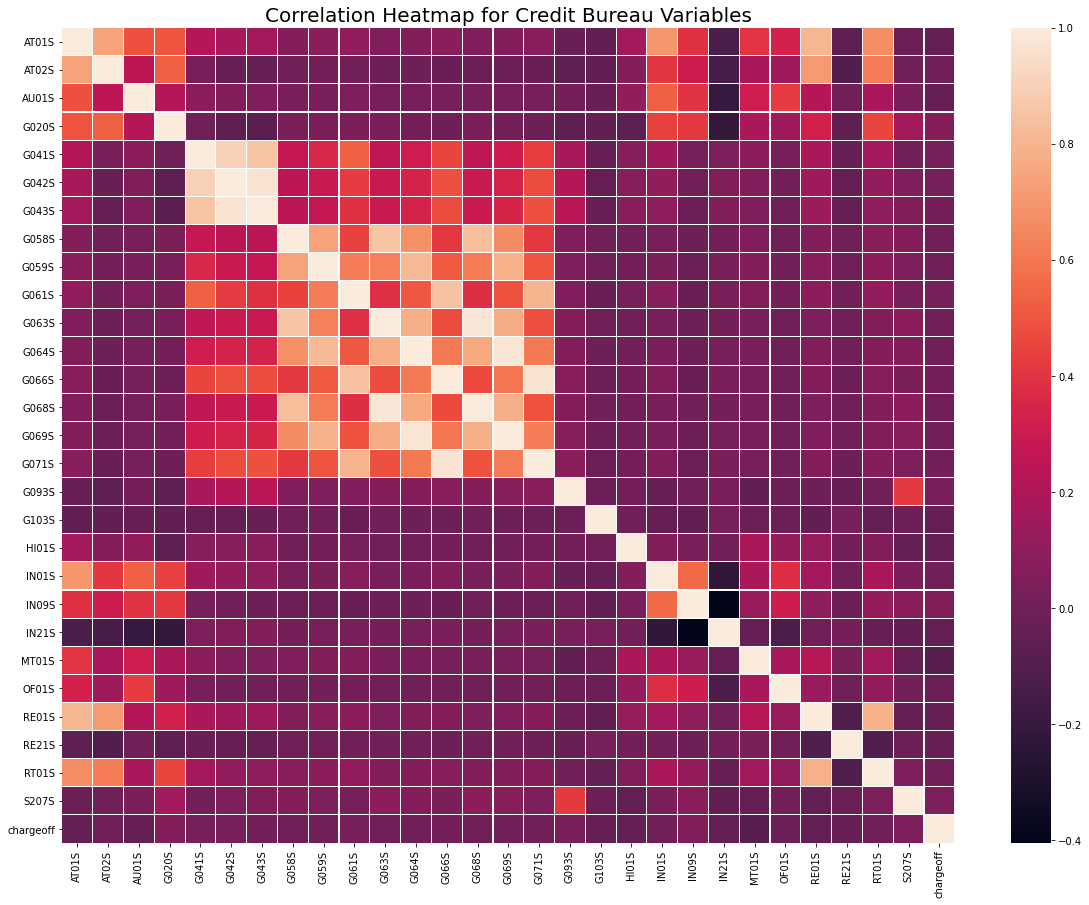

In [46]:
# Heatmap for credit bureau columns and chargeoff
fig, ax = plt.subplots(figsize=(20,15))
cb_corr = df_eda[[*tu_cols, 'chargeoff']].corr()
sns.heatmap(cb_corr, linewidths=.1, ax=ax)
plt.title('Correlation Heatmap for Credit Bureau Variables', size=20)
plt.show()

There is a high degree of correlation within the credit bureau fields especially for the `G0_` columns.  None of the fields on their own have a strong correlation with `chargeoff`.

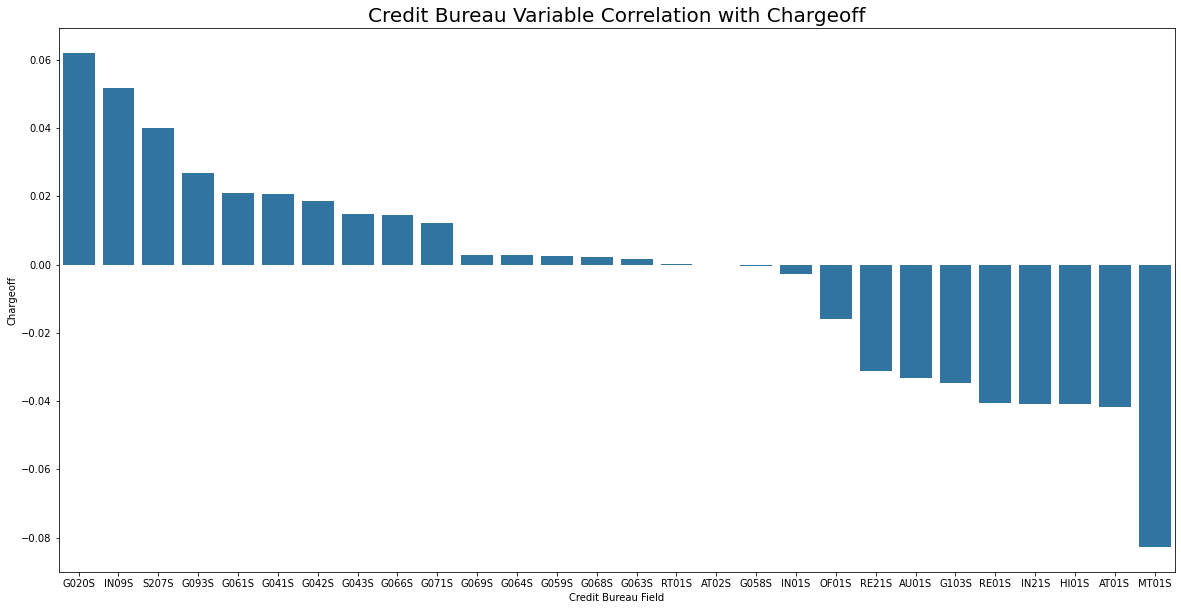

In [47]:
fig, ax = plt.subplots(figsize=(20,10))
# Chargeoff correlation values
cb_corr_co = cb_corr['chargeoff']
# Exclude correlation with itself
cb_corr_co = cb_corr_co.loc[~cb_corr_co.index.isin(['chargeoff'])]
cb_corr_co.sort_values(ascending=False, inplace=True)
cb_corr_co = cb_corr_co.reset_index()
# Create barplot
sns.barplot(x='index', y='chargeoff', data=cb_corr_co, color='tab:blue', ax=ax)
plt.xlabel('Credit Bureau Field')
plt.ylabel('Chargeoff')
plt.title('Credit Bureau Variable Correlation with Chargeoff', size=20)
plt.show()

`G020S` - "Number of trades with maximum delinquency of 30 days past due in past 24 months" and `IN09S` - "Number of installment trades opened in past 24 months" have the highest positive correlation and `MT01S` - "Number of mortgage trades" has the lowest negative correlation.

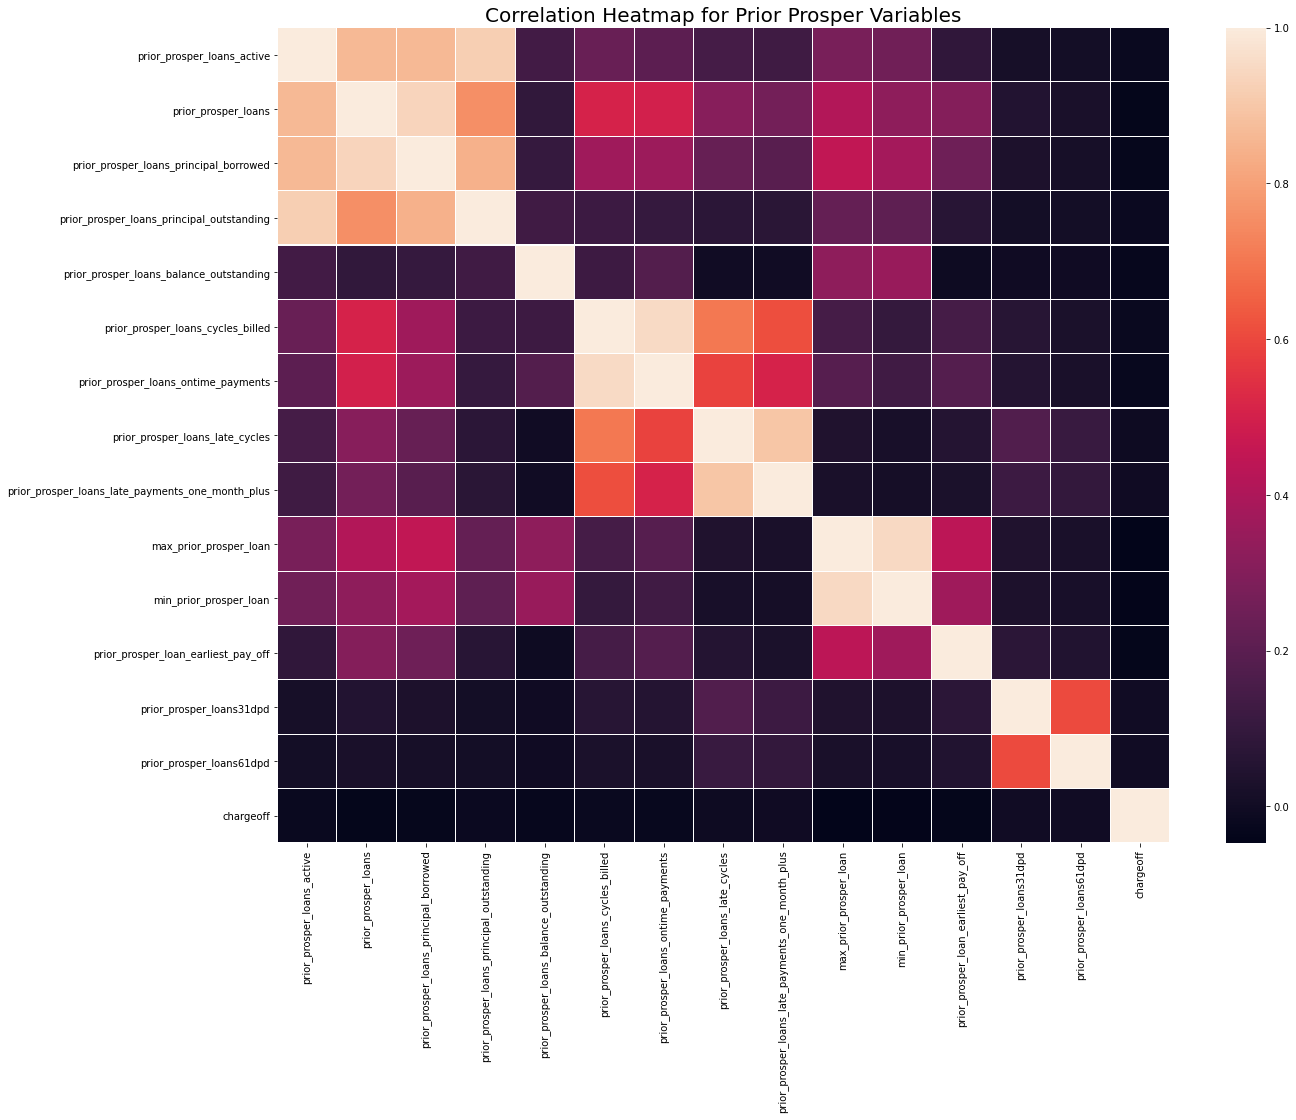

In [48]:
fig, ax = plt.subplots(figsize=(20,15))
prior_corr = df_eda[[*prior_prosper_cols, 'chargeoff']].corr()
sns.heatmap(prior_corr, linewidths=.1, ax=ax)
plt.title('Correlation Heatmap for Prior Prosper Variables', size=20)
plt.show()

All `prior_prosper_` columns have virtually no correlation with chargeoff.  This is due to large skewness to zero values where most listings are for borrowers with no prior Prosper loans.

### 2.3.4 Credit Bureau Multicollinearity

In [49]:
# Standardize the credit bureau fields
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
tu_scaled = pd.DataFrame(scaler.fit_transform(df_eda[tu_cols]), columns=tu_cols)

tu_scaled = tu_scaled.merge(df_eda[['chargeoff']], left_index=True, right_index=True)

tu_scaled.head()

AT01S     AT02S     AU01S     G020S     G041S     G042S     G043S  \
0 -0.791321 -0.392097 -0.324881 -0.974892 -0.644706 -0.500839 -0.459867   
1  0.613529  0.466385 -0.710028 -0.974892  0.536320  0.897432  0.530311   
2 -0.543406 -0.220400  0.445414 -0.974892 -0.644706 -0.500839 -0.459867   
3  1.191996  1.668260  0.060266 -0.872255  0.142645 -0.500839 -0.459867   
4  0.448252  0.466385  1.600855 -0.974892  0.142645 -0.500839 -0.459867   

      G058S     G059S     G061S  ...     IN01S     IN09S     IN21S     MT01S  \
0 -0.223331 -0.287586 -0.377003  ... -0.488079 -0.315475 -0.206394 -0.838894   
1 -0.223331 -0.287586 -0.377003  ... -0.785396 -0.917938  0.837977  0.942586   
2 -0.223331 -0.287586 -0.377003  ... -0.488079 -0.315475  0.117721  0.942586   
3 -0.223331 -0.287586  0.649416  ...  1.147168  0.286989 -0.278420 -0.838894   
4 -0.223331 -0.287586 -0.377003  ...  0.849850 -0.917938  0.153734  1.536412   

      OF01S     RE01S     RE21S     RT01S     S207S  chargeoff  
0 -0.544149 -0.564130 -0.039301  0.176077 -0.298049          1  
1 -0.544149  1.395895 -0.136739 -0.044511 -0.298049          1  
2 -0.544149 -0.564130 -0.006822 -0.265099 -0.298049          1  
3  3.467258  1.028390 -0.364095  1.499606 -0.298049          1  
4  4.561277 -0.564130  0.447890 -0.926864 -0.298049          1  

[5 rows x 29 columns]

In [50]:
# Use variable inflation factor analysis to identify multicollinearity within all credit bureau columns
from statsmodels.stats.outliers_influence import variance_inflation_factor

tu_vif = pd.DataFrame()
tu_vif['tu_col'] = tu_cols
tu_vif["VIF"] = [variance_inflation_factor(tu_scaled[tu_cols].values, i) for i in range(len(tu_cols))]
tu_vif.set_index('tu_col', inplace=True)
tu_vif

VIF
tu_col            
AT01S   470.967851
AT02S     2.978555
AU01S     1.678863
G020S     1.922842
G041S     9.110590
G042S    34.234769
G043S    22.483506
G058S     6.515448
G059S     7.242154
G061S     7.750088
G063S    47.784144
G064S    41.294119
G066S    30.344126
G068S    43.773861
G069S    37.092382
G071S    23.023567
G093S     1.323351
G103S     1.006331
HI01S     1.342174
IN01S   146.658894
IN09S     1.792891
IN21S     1.218202
MT01S    10.283551
OF01S     1.311674
RE01S   223.145509
RE21S     1.023450
RT01S     3.133635
S207S     1.309870

As referenced in the [Variance Inflation Factor wiki](https://en.wikipedia.org/wiki/Variance_inflation_factor), VIF is > 10 is a good rule of thumb for determining if multicollinearity is high but sometimes 5 is used.  For our purposes, we will remove any credit bureau column if VIF is > 5.

In [51]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

# Isolate credit bureau columns that have a variance_inflation_factor > 5 to remove columns that can be predicted
# by other credit bureau columns
tu_cols_nomc = list(tu_vif[tu_vif['VIF'] <= 5].index)
X = tu_scaled[tu_cols_nomc]

y = tu_scaled['chargeoff']

log_reg = sm.Logit(y, X).fit()

print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.688354
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:              chargeoff   No. Observations:               579634
Model:                          Logit   Df Residuals:                   579622
Method:                           MLE   Df Model:                           11
Date:                Mon, 17 May 2021   Pseudo R-squ.:                 -0.4358
Time:                        07:55:36   Log-Likelihood:            -3.9899e+05
converged:                       True   LL-Null:                   -2.7789e+05
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
AT02S         -0.0623      0.004    -16.746      0.000      -0.070      -0.055
AU01S         -0.0855      0.

All p-values in the Logistic Regression model are < .05 so these columns will be carried forward to the modeling step for further evaluation.

### 2.3.5 Data Relationship Summary

- `listing_amount` is skewed and will need to be normalized.  Amounts are capped for higher risk borrowers and the distribution of charged off loans is higher for lower loan amounts.
- `prosper_rating` is an alpha scale rating the risk of the borrower with "AA" being the highest quality borrower and "HR" being the lowest.  "AA" listings are the strongest predictor for `chargeoff`.
- `lender_yield` and `borrower_apr` columns are perfectly correlation with `borrower_rate` so will only retain the `borrower_rate` column.
- `listing_term` represents the term of the loan and there are only 2 term lengths 36 and 60 months.  60 month loans have a much higher probability of `chargeoff`.
- `listing_monthly_payment` is based directly on the `listing_amount` and `borrower_rate` so this column will be discarded.
- `prosper_score` is a custom risk score and the score ranges from 1 to 11, 11 having the lowest risk although no observed values for a score of 1.  Replace the zero values with the most likely score based on the `prosper_rating`.
- `income_range` is an ordinal representation of the borrowers income.  Since the `stated_monthly_income` is the monthly income, as provided by the borrower and had extreme outliers values that appeared very abnormal `stated_monthly_income` will be discarded.
- `employment_status_description` will be cleaned to three values: Employed, Self-employed and Not-employed and then one-hot encoded in the preprocessing stage.
- `occupation` and `borrower_state` will be WoE encoded in the preprocessing stage.
- `months_employed` has some extreme outlier values that are not within reason for a human to reasonably work.  However, once removed there is no difference in the distribution for chargeoff so this column will be discarded.
- Higher `dti_wprosper_loan` values have a higher probability for `chargeoff`.
- Most borrowers do not have a prior prosper loan and no correlation with `chargeoff` so all `prior_prosper_` columns will be discarded.
- The 12 credit bureau columns that did not exhibit high multicollinearity will be evaluated further in model training.
- Closed loans >= March 2020 will be excluded from modeling due to `chargeoff` volumne reduction due to coronavirus pandemic.